### **Stroke Prediction Model - Predictive Analytics**

**Import library**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

**Load Data**

In [34]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Drop kolom atribut id data

In [35]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Exploratory Data Analytics (EDA)**

**Deskripsi Variabel**

mengecek informasi pada dataset dengan fungsi info()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


mengecek deksripsi statistik data dengan fitur describe()

In [37]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Missing Value**

cek apakah ada data pada atribut yang bernilai null

In [38]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

membuat box plot dengan kode berikut

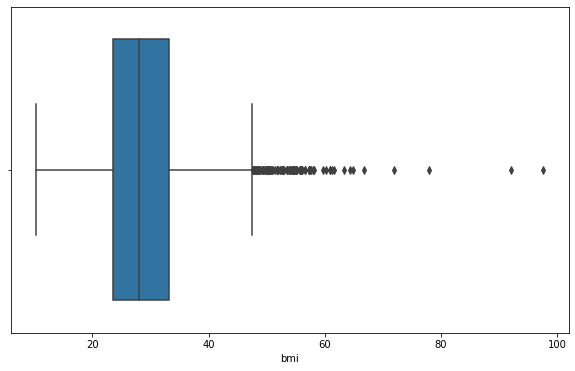

In [39]:
fig = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data, x='bmi')

dari box plot diatas, terdapat data outlier dan mana dapat mempengaruhi nilai mean, dengan begitu nilai null lebih cocok untuk diganti dengan nilai median

In [40]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Univariate Analysis**

membagi dataset menjadi dua bagian, yaitu numerical dan categorical

In [41]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Categorical Features

Fitur Gender

        jumlah sampel  persentase
Female           2994        58.6
Male             2115        41.4
Other               1         0.0


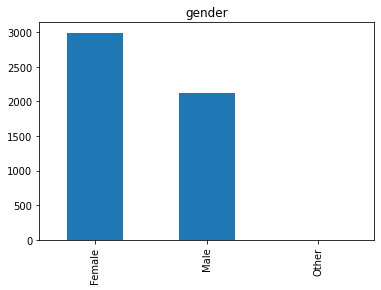

In [42]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 3 kategori pada fitur gender, secara berurutan Female memiliki jumlah paling banyak.

Fitur Hypertension

   jumlah sampel  persentase
0           4612        90.3
1            498         9.7


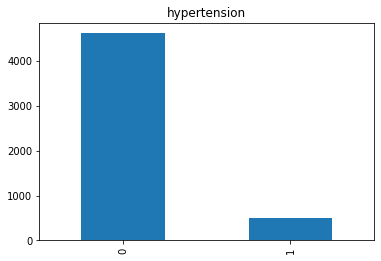

In [43]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada grafik diatas bisa disimpulkan bahwa dari data lebih banyak grade pada pasien yang tidak memiliki tekanan darah

Fiture Heart_disease

   jumlah sampel  persentase
0           4834        94.6
1            276         5.4


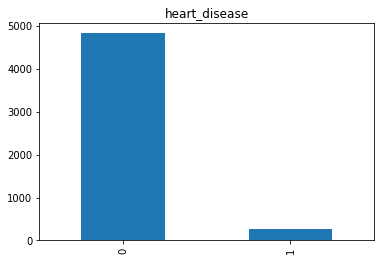

In [44]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada grafik diatas bisa disimpulkan bahwa dari data lebih banyak grade pada pasien yang tidak memiliki penyakit jantung

Fitur ever_merried

     jumlah sampel  persentase
Yes           3353        65.6
No            1757        34.4


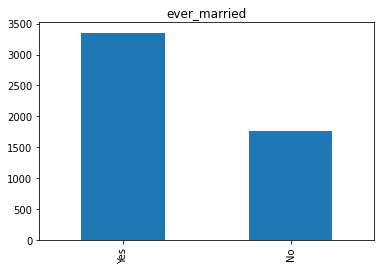

In [45]:
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada grafik diatas bisa disimpulkan bahwa dari data lebih banyak grade pada pasien yang sudah menikah

Fitur work_type

               jumlah sampel  persentase
Private                 2925        57.2
Self-employed            819        16.0
children                 687        13.4
Govt_job                 657        12.9
Never_worked              22         0.4


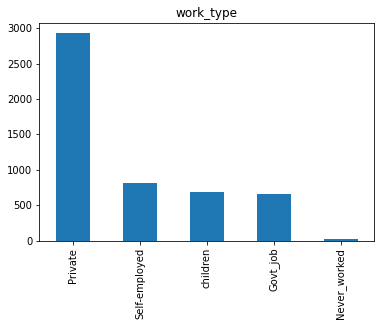

In [46]:
feature = categorical_features[4]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada grafik diatas bisa disimpulkan bahwa private memiliki grade tertinggi

Fitur Residence_type

       jumlah sampel  persentase
Urban           2596        50.8
Rural           2514        49.2


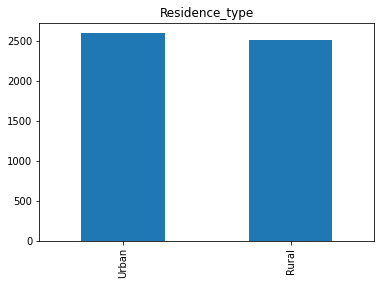

In [47]:
feature = categorical_features[5]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada grafik diatas bisa disimpulkan bahwa antar pasien yang tinggal di kota maupun pedesaan hampir memiliki grade yang sama 

Fitur smoking status

                 jumlah sampel  persentase
never smoked              1892        37.0
Unknown                   1544        30.2
formerly smoked            885        17.3
smokes                     789        15.4


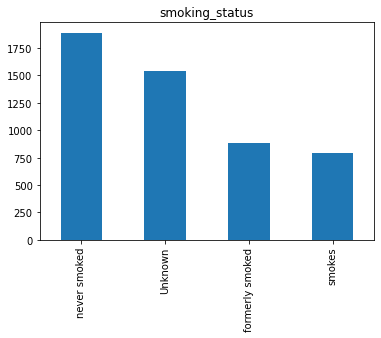

In [48]:
feature = categorical_features[6]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari grafik di tas, orang yang tidak pernah merokok memiliki grade tertinggi dan orang dengan status perokok memiliki grade yang rendah

**Data Preparation**

Melakukan encoding fitur dengan get_dummies. Pada tahap ini yaitu mengubah fitur kategori agar menjadi angka/numerik yang digunakan untuk untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori. Fitur tersebut adalah gender, ever_merried, work_type, Residence_type dan smoking status.

In [49]:
from sklearn.preprocessing import  OneHotEncoder

data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')],axis=1)
data = pd.concat([data, pd.get_dummies(data['ever_married'], prefix='ever_married')],axis=1)
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work_type')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Residence_type'], prefix='Residence_type')],axis=1)
data = pd.concat([data, pd.get_dummies(data['smoking_status'], prefix='smoking_status')],axis=1)
data.drop(['gender','ever_married','work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


Reduksi dimensi dengan PCA

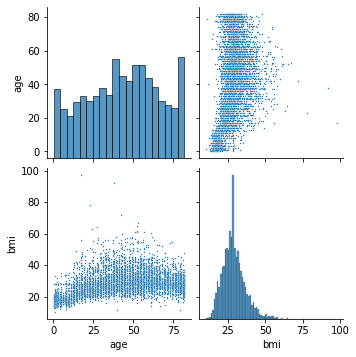

In [50]:
sns.pairplot(data[['age','bmi']], plot_kws={'s':2})

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(data[['age','bmi']])
princ_comp = pca.transform(data[['age','bmi']])

Kode di atas memanggil class PCA() dari library sciikit-learn. Paremeter yang kita masukkan ke dalam class adalah n_components dan random_state. Parameter n_components merupakan jumlah komponen atau dimensi, dalam kasus kita jumlahnya ada 2, yaitu 'age', dan 'bmi'. Pada parameter random_state kita menerapkan random_state = 123. 

setelah menerapkan class PCA, kita bisa mengetahui proporsi informasi dari kedua komponen tadi

In [52]:
pca.explained_variance_ratio_.round(3)

array([0.908, 0.092])

Arti dari output di atas adalah, 90.8% informasi pada ketiga fitur ‘age’, ‘bmi’ terdapat pada PC pertama. 

In [53]:
pca = PCA(n_components=1, random_state=123)
pca.fit(data[['age','bmi']])
data['fitur'] = pca.transform(data.loc[:, ('age','bmi')]).flatten()
data.drop(['age','bmi'], axis=1, inplace=True)

membagi data menjadi data train dan test dengan proporsi 80:20

In [54]:
from sklearn.model_selection import train_test_split
 
X = data.drop(["stroke"],axis =1)
y = data["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [55]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5110
Total # of sample in train dataset: 4088
Total # of sample in test dataset: 1022


Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji

In [56]:
from sklearn.preprocessing import StandardScaler

numerik = ['avg_glucose_level','fitur']
scaler = StandardScaler()
scaler.fit(X_train[numerik])
X_train[numerik] = scaler.transform(X_train.loc[:, numerik])
X_train[numerik].head()

,avg_glucose_level,fitur
1351,-0.608721,-0.932380
3816,-1.105993,0.044071
3044,-0.510009,1.526545
1309,1.627146,-1.625988
684,0.521661,1.905098


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1

In [57]:
X_train[numerik].describe().round(4)

,avg_glucose_level,fitur
count,4088.0000,4088.0000
mean,0.0000,0.0000
std,1.0001,1.0001
min,-1.1270,-1.7965
25%,-0.6380,-0.7716
50%,-0.3248,-0.0874
75%,0.1711,0.7857
max,3.5169,1.9847


dari tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1

**Modelling**

In [58]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

K-Nearest Neighbor 

Pada model algoritama ini menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Random Forest 

Pada model algoritma ini terdapat beberapa parameter yang di isi dengan nilai :

*   n_estimators = 50 untuk jumlah trees (pohon) di forest
*   max_depth = 16 untuk membagi setiap node ke dalam jumlah pengamatan
*   random_state = 55 untuk mengontrol random number generator 
*   n_jobs = -1  untuk mengontrol thread atau proses yang berjalan secara paralel





In [60]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Boosting

Pada model algoritma ini terdapat beberapa parameter yang di isi dengan nilai :

*   learning_rate = 0.05 bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi
*   random_state = 55 untuk mengontrol random number generator yang digunakan



In [61]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

**Evaluasi Model**

Pada potongan kode dibawah, Saat menghitung nilai Mean Squared Error pada data train dan test, kita membaginya dengan nilai 1e3. Hal ini bertujuan agar nilai mse berada dalam skala yang tidak terlalu besar

In [62]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000038,0.000055
RF,0.000007,0.00007
Boosting,0.000046,0.000082


tabel di atas adalah hasil evaluasi pada data latih dan data test

plot metrik tersebut dengan bar chart

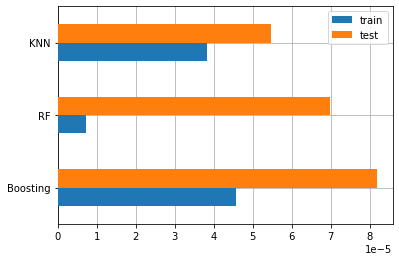

In [63]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model K-Nearest Neighbor (KNN) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 8)